## Reading the data

1. We will resize the image to 64 * 64 as the original images dimensions were so big (512 * 384) and not (128 * 128) because the models were overfitting
2. We will use Lab color space as the normal RGB makes the models overfit and makes the data have so many features but we also want to maintain the colors and textures in the photos as they are key charcteristics in food classification problem

In [ ]:
# Import required libraries
import os
import cv2
import pandas as pd
import numpy as np

# Define paths
base_path = "dataset"

# Initialize lists
data = []
labels = []

# Define image size
image_size = (64, 64)  # Resize images to this size

# Process images with color space conversion
for label in os.listdir(base_path):  # Each folder is a class label
    folder_path = os.path.join(base_path, label)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                # Read the image in color (BGR format)
                img = cv2.imread(file_path)
                if img is None:
                    continue

                # Resize the image
                img = cv2.resize(img, image_size)

                #Lab Color Space (a and b Channels)
                lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
                a_channel = lab_img[:, :, 1]  # Green-Red
                b_channel = lab_img[:, :, 2]  # Blue-Yellow

                a_channel_normalized = a_channel / 255.0
                b_channel_normalized = b_channel / 255.0

                #combine a and b channels
                combined_lab = np.dstack((a_channel_normalized, b_channel_normalized)).flatten()


                # Append features tp the data
                data.append(combined_lab)
                labels.append(label)
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# Create a DataFrame
df = pd.DataFrame(data)
df['label'] = labels

# Save to a CSV file
df.to_csv("food_classification_data.csv", index=False)


## Read the csv file

In [1]:
import pandas as pd

df =pd.read_csv("food_classification_data.csv")

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,0.545098,0.521569,0.545098,0.513725,0.541176,0.513725,0.537255,0.505882,0.537255,0.505882,...,0.521569,0.509804,0.525490,0.509804,0.525490,0.509804,0.525490,0.509804,0.525490,caesar_salad
1,0.501961,0.505882,0.501961,0.505882,0.501961,0.505882,0.501961,0.505882,0.501961,0.505882,...,0.576471,0.560784,0.580392,0.552941,0.572549,0.541176,0.576471,0.541176,0.564706,caesar_salad
2,0.509804,0.494118,0.509804,0.494118,0.509804,0.494118,0.509804,0.494118,0.560784,0.501961,...,0.556863,0.509804,0.549020,0.513725,0.541176,0.505882,0.549020,0.505882,0.537255,caesar_salad
3,0.545098,0.364706,0.541176,0.368627,0.541176,0.376471,0.541176,0.376471,0.537255,0.380392,...,0.380392,0.533333,0.376471,0.525490,0.400000,0.533333,0.427451,0.529412,0.439216,caesar_salad
4,0.494118,0.509804,0.501961,0.505882,0.501961,0.505882,0.509804,0.509804,0.501961,0.509804,...,0.584314,0.529412,0.568627,0.525490,0.560784,0.517647,0.576471,0.517647,0.572549,caesar_salad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.490196,0.549020,0.498039,0.537255,0.490196,0.529412,0.494118,0.525490,0.486275,0.533333,...,0.462745,0.494118,0.462745,0.494118,0.462745,0.498039,0.466667,0.494118,0.462745,tacos
4996,0.525490,0.521569,0.541176,0.521569,0.533333,0.521569,0.541176,0.521569,0.525490,0.521569,...,0.784314,0.611765,0.784314,0.615686,0.780392,0.619608,0.776471,0.627451,0.749020,tacos
4997,0.494118,0.490196,0.498039,0.482353,0.494118,0.482353,0.494118,0.486275,0.494118,0.490196,...,0.458824,0.486275,0.470588,0.494118,0.470588,0.490196,0.470588,0.490196,0.474510,tacos
4998,0.525490,0.509804,0.533333,0.513725,0.549020,0.525490,0.560784,0.521569,0.556863,0.525490,...,0.572549,0.509804,0.596078,0.509804,0.603922,0.513725,0.568627,0.490196,0.564706,tacos


In [2]:
# Randomize the data order
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,0.482353,0.501961,0.474510,0.501961,0.494118,0.498039,0.490196,0.501961,0.494118,0.509804,...,0.505882,0.501961,0.501961,0.498039,0.509804,0.541176,0.521569,0.509804,0.505882,chocolate_cake
1,0.501961,0.501961,0.501961,0.501961,0.501961,0.501961,0.501961,0.501961,0.501961,0.501961,...,0.498039,0.501961,0.498039,0.501961,0.498039,0.501961,0.498039,0.501961,0.498039,churros
2,0.564706,0.603922,0.576471,0.592157,0.588235,0.576471,0.580392,0.572549,0.576471,0.592157,...,0.596078,0.568627,0.580392,0.556863,0.580392,0.560784,0.584314,0.564706,0.588235,churros
3,0.478431,0.600000,0.474510,0.592157,0.474510,0.592157,0.486275,0.592157,0.486275,0.647059,...,0.525490,0.498039,0.521569,0.498039,0.509804,0.505882,0.494118,0.501961,0.486275,chocolate_cake
4,0.513725,0.454902,0.517647,0.458824,0.513725,0.458824,0.509804,0.470588,0.517647,0.470588,...,0.647059,0.537255,0.647059,0.533333,0.658824,0.533333,0.662745,0.541176,0.666667,caesar_salad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.501961,0.505882,0.501961,0.509804,0.501961,0.509804,0.501961,0.509804,0.501961,0.505882,...,0.505882,0.549020,0.498039,0.556863,0.486275,0.545098,0.478431,0.537255,0.478431,tacos
4996,0.509804,0.498039,0.509804,0.498039,0.494118,0.505882,0.501961,0.501961,0.501961,0.509804,...,0.505882,0.501961,0.505882,0.501961,0.505882,0.501961,0.505882,0.501961,0.505882,caesar_salad
4997,0.478431,0.474510,0.501961,0.470588,0.494118,0.474510,0.498039,0.474510,0.490196,0.470588,...,0.560784,0.501961,0.560784,0.517647,0.584314,0.529412,0.623529,0.541176,0.592157,donuts
4998,0.521569,0.549020,0.517647,0.560784,0.517647,0.560784,0.513725,0.560784,0.513725,0.560784,...,0.674510,0.752941,0.686275,0.752941,0.682353,0.749020,0.647059,0.749020,0.639216,donuts


## Data preprocessing and spliting

In [3]:
# split the dataframe into X (featuress) and y (target)
X = df.drop(columns=['label'])
y=df["label"]

In [4]:
from sklearn.decomposition import PCA

# applying PCA with 92% variance
pca = PCA(n_components=0.92)
X_reduced = pca.fit_transform(X)

In [8]:
X_reduced.shape

(5000, 527)

In [5]:
df_pca = pd.DataFrame(X_reduced)

# Add the labels back to the DataFrame
df_pca['label'] = y.values 
df_pca

,0,1,2,3,4,5,6,7,8,9,...,518,519,520,521,522,523,524,525,526,label
0,0.470747,0.830370,-0.178307,-2.547101,-1.350480,0.790117,1.088291,-0.140031,0.103680,0.603396,...,-0.028950,0.039969,0.021170,0.072648,-0.086600,0.022262,-0.011694,-0.033728,0.027717,chocolate_cake
1,-3.001618,0.396272,-0.061886,-0.612756,-0.747002,0.525710,-0.328116,-0.560544,0.135787,0.327234,...,0.008539,0.005137,-0.005509,-0.006983,-0.008063,0.025905,0.034802,0.019583,-0.014228,churros
2,2.067573,2.886779,0.542512,0.825242,-0.023376,0.010435,-0.223562,0.212019,0.151319,-1.031826,...,-0.036348,-0.021570,-0.008608,0.011410,-0.048851,0.056598,0.018904,-0.011297,0.005039,churros
3,-2.888952,0.599614,2.177320,-1.662895,0.201328,0.019212,-0.025139,-0.528552,-1.268758,0.050596,...,-0.042263,0.001015,-0.009139,0.008062,-0.073793,-0.035137,-0.014862,0.027116,-0.144144,chocolate_cake
4,2.266295,1.292298,0.266713,0.877085,-0.496631,0.223347,0.185609,0.096757,0.145614,0.966760,...,-0.069245,0.060668,-0.022788,0.115776,-0.069979,0.044958,-0.034511,0.030722,-0.019651,caesar_salad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.104537,1.267695,-2.121369,-0.667016,-0.637296,-0.004243,-0.328725,-0.137257,0.547964,0.355290,...,-0.008094,-0.071707,-0.089626,-0.054940,0.025947,-0.026856,0.073763,0.145293,-0.023805,tacos
4996,6.476978,-2.496837,-2.266479,-2.216309,-0.034764,0.676561,-1.104009,-0.856583,-1.183522,0.471866,...,0.013387,-0.032612,0.022111,0.012110,0.052194,-0.081727,-0.059459,0.111939,-0.066580,caesar_salad
4997,-1.756361,-0.758448,0.429852,0.943503,-0.056294,-0.008100,0.400571,-0.912624,-1.486771,0.718232,...,0.026124,0.048683,0.005514,-0.004664,-0.014214,-0.013462,0.054217,-0.002293,-0.039939,donuts
4998,1.162841,2.669146,-1.362729,1.438476,0.673670,-2.241329,-1.660198,1.380693,-0.110617,1.578571,...,-0.269114,0.163238,0.310861,0.144285,-0.095716,0.244210,-0.014569,0.254252,0.225279,donuts


In [6]:
from sklearn.preprocessing import LabelEncoder
#Saving the classes name to be used later in the evaluation metrics
classes = df_pca["label"].unique()

label_encoder = LabelEncoder()

# Encoding the labels
df_pca['label'] = label_encoder.fit_transform(df_pca['label'])

df_pca

,0,1,2,3,4,5,6,7,8,9,...,518,519,520,521,522,523,524,525,526,label
0,0.470747,0.830370,-0.178307,-2.547101,-1.350480,0.790117,1.088291,-0.140031,0.103680,0.603396,...,-0.028950,0.039969,0.021170,0.072648,-0.086600,0.022262,-0.011694,-0.033728,0.027717,1
1,-3.001618,0.396272,-0.061886,-0.612756,-0.747002,0.525710,-0.328116,-0.560544,0.135787,0.327234,...,0.008539,0.005137,-0.005509,-0.006983,-0.008063,0.025905,0.034802,0.019583,-0.014228,2
2,2.067573,2.886779,0.542512,0.825242,-0.023376,0.010435,-0.223562,0.212019,0.151319,-1.031826,...,-0.036348,-0.021570,-0.008608,0.011410,-0.048851,0.056598,0.018904,-0.011297,0.005039,2
3,-2.888952,0.599614,2.177320,-1.662895,0.201328,0.019212,-0.025139,-0.528552,-1.268758,0.050596,...,-0.042263,0.001015,-0.009139,0.008062,-0.073793,-0.035137,-0.014862,0.027116,-0.144144,1
4,2.266295,1.292298,0.266713,0.877085,-0.496631,0.223347,0.185609,0.096757,0.145614,0.966760,...,-0.069245,0.060668,-0.022788,0.115776,-0.069979,0.044958,-0.034511,0.030722,-0.019651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.104537,1.267695,-2.121369,-0.667016,-0.637296,-0.004243,-0.328725,-0.137257,0.547964,0.355290,...,-0.008094,-0.071707,-0.089626,-0.054940,0.025947,-0.026856,0.073763,0.145293,-0.023805,4
4996,6.476978,-2.496837,-2.266479,-2.216309,-0.034764,0.676561,-1.104009,-0.856583,-1.183522,0.471866,...,0.013387,-0.032612,0.022111,0.012110,0.052194,-0.081727,-0.059459,0.111939,-0.066580,0
4997,-1.756361,-0.758448,0.429852,0.943503,-0.056294,-0.008100,0.400571,-0.912624,-1.486771,0.718232,...,0.026124,0.048683,0.005514,-0.004664,-0.014214,-0.013462,0.054217,-0.002293,-0.039939,3
4998,1.162841,2.669146,-1.362729,1.438476,0.673670,-2.241329,-1.660198,1.380693,-0.110617,1.578571,...,-0.269114,0.163238,0.310861,0.144285,-0.095716,0.244210,-0.014569,0.254252,0.225279,3


In [ ]:
#Save the final dataframe to use it directly if needed later
df_pca.to_csv("dataset_pca.csv")

In [7]:
from sklearn.model_selection import train_test_split
# split the dataframe into X (featuress) and y (target)
X = df_pca.drop(columns=["label"])
y = df_pca["label"]

# split the data into train and test with test size of 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
1840,5.271229,3.395643,-0.298742,-0.326333,-0.426568,-1.360333,0.438222,0.791198,-0.641518,-0.121185,...,-0.062652,-0.028442,0.027515,0.062158,-0.018332,0.056828,0.104747,0.005389,-0.055910,0.010326
2115,-1.267440,0.223810,1.298487,-0.226803,-0.794997,0.161389,-0.566669,0.975434,0.611802,-0.426524,...,0.003450,0.038947,0.117722,0.022244,-0.044851,0.008147,0.003345,-0.034284,-0.041179,-0.019070
4437,9.970929,0.586917,3.148258,-0.438012,1.560766,-0.317880,0.513738,1.020314,-0.012364,1.030642,...,-0.019422,-0.117525,0.085806,-0.020704,0.094527,0.033471,-0.063329,-0.086940,0.113403,0.042055
1146,-0.444493,1.260050,-1.435490,2.982252,-0.427792,0.753281,-1.048706,1.692500,1.230691,1.448140,...,0.015159,-0.088137,-0.043956,-0.063104,0.027655,0.052773,0.068360,-0.105201,0.037113,-0.005027
2486,-1.535591,-0.884448,-1.169918,0.166711,-0.166861,-1.981204,0.357317,-0.191999,0.708978,0.226218,...,0.030762,-0.022386,0.001521,0.017745,0.078646,0.002590,-0.064522,0.040931,-0.020260,0.011174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.999306,4.044866,-2.238495,2.119085,0.800755,0.510572,-0.059486,0.357111,0.903118,1.503431,...,-0.083005,-0.114236,0.001048,-0.153145,-0.062349,0.075416,0.042327,0.052474,0.014910,0.181142
466,1.046301,2.182482,-0.403400,-1.602615,-0.040414,-0.830368,0.056286,0.156028,-1.240473,-1.183303,...,-0.090963,-0.061788,-0.017566,0.064835,-0.040004,0.041988,-0.065969,-0.030932,-0.077306,0.021541
3092,1.986184,0.769535,-1.467026,0.750391,-0.877861,-0.760663,1.144034,-0.280762,0.441105,0.025930,...,-0.007746,0.027958,-0.046961,0.021943,0.012306,0.029279,0.030565,0.041762,-0.023494,0.095889
3772,1.495009,-2.702814,1.268453,-0.527528,1.003696,1.108016,-0.917603,0.319128,-0.091875,0.896365,...,0.139398,0.019407,-0.001726,-0.023070,0.031623,-0.066714,-0.074223,-0.011213,0.154048,-0.092681


## Modeling

### Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


#hyperparameter tuning the logistic regression with Grid search
param_grid = {'C': [0.01, 0.1]
              , "solver" : ["lbfgs",'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
               "penalty": ["l1" ,"l2"]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_estimator_

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\L

LogisticRegression(C=0.01, solver='newton-cholesky')

In [11]:
model = grid.best_estimator_

### KNN Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# knn classifier with 15 n_neghbors to reduce the overfit and using brute algorithm beacuase the data has 500+ features (High-Dimensional Data)
knn = KNeighborsClassifier(n_neighbors=15,algorithm="brute")
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=15)

## Models Evaluation

### Accuracy

In [89]:
from sklearn.metrics import accuracy_score


## Accuracy score of the Logistic regression

y_train_pred_lr = grid.best_estimator_.predict(X_train)
y_test_pred_lr = grid.best_estimator_.predict(X_test)

print(f"train accuracy: {accuracy_score(y_train,y_train_pred_lr)}\ntest accuracy: {accuracy_score(y_test,y_test_pred_lr)}")

train accuracy: 0.504
test accuracy: 0.4726666666666667


In [ ]:
## Accuracy score of the KNN Classifier

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

print(f"train accuracy: {accuracy_score(y_train,y_train_pred_knn)}\ntest accuracy: {accuracy_score(y_test,y_test_pred_knn)}")

train accuracy: 0.44342857142857145
test accuracy: 0.4033333333333333


1. Logistic regression has better accuracy than KNN as it has about 10% more accuracy 
2. Logistic regression is more generalized (less overfit) as the difference between the train and test is about 2.5% in the logistic and 4% in the KNN

So Logistic Regression is performs better than KNN in terms of accuracy

### Confusion Matrix

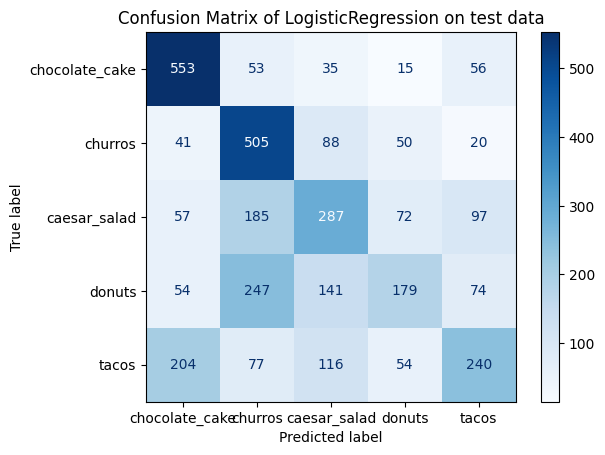

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix for the training data of the Logistic regression
cm = confusion_matrix(y_train, y_train_pred_lr)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of LogisticRegression on test data")
plt.show()


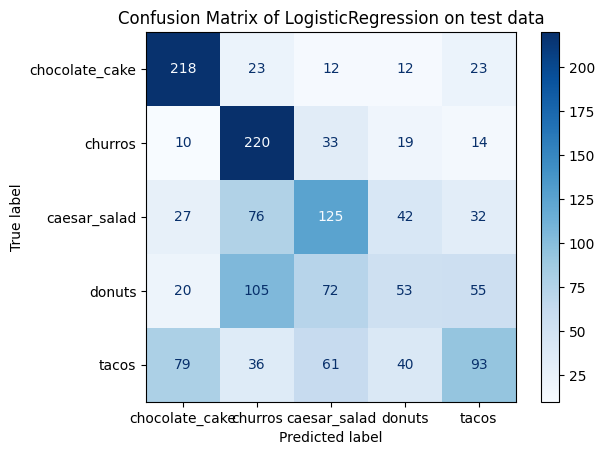

In [91]:
# Create confusion matrix for the test data of the Logistic regression
cm = confusion_matrix(y_test, y_test_pred_lr)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of LogisticRegression on test data")
plt.show()

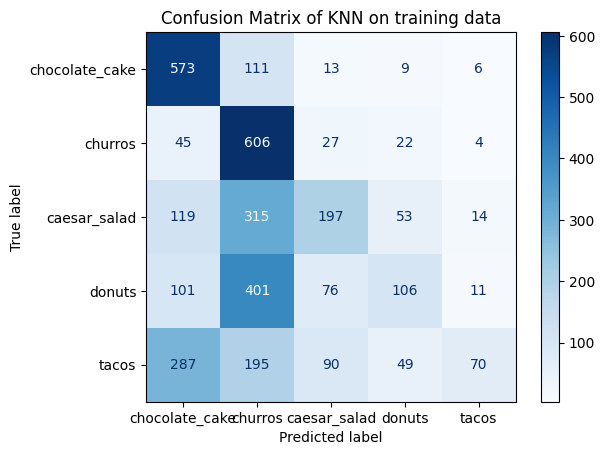

In [92]:
# Create confusion matrix for the training data of the KNN
cm = confusion_matrix(y_train, y_train_pred_knn)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of KNN on training data")
plt.show()

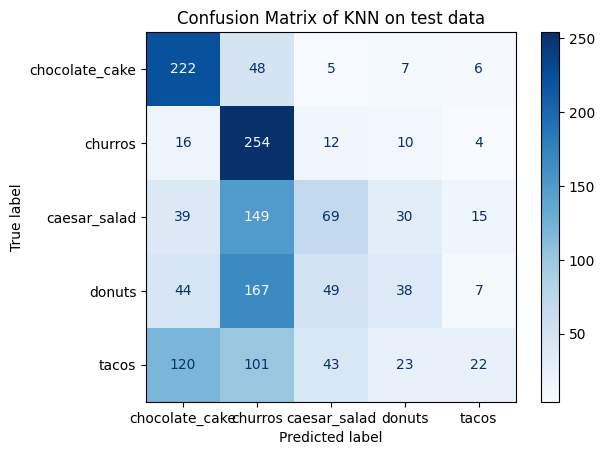

In [93]:
# Create confusion matrix for the test data of the KNN
cm = confusion_matrix(y_test, y_test_pred_knn)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of KNN on test data")
plt.show()

1. Both models confusion matricies are about the same on test and train
2. Both models perform the best on the chocolate cake and churros as they get most of them correct in both the train and test data
3. KNN perform so bad on donuts as it misclassify most of them as churros

### AUC

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predicted probabilities


y_train_pred_lr_prob = grid.best_estimator_.predict_proba(X_train)
y_test_pred_lr_prob = grid.best_estimator_.predict_proba(X_test)

roc_auc_score_lr_train = roc_auc_score(y_train, y_train_pred_lr_prob,multi_class="ovr")
roc_auc_score_lr_test = roc_auc_score(y_test, y_test_pred_lr_prob,multi_class="ovr")

print(f"ROC_AUC_Score LR train: {roc_auc_score_lr_train}\nROC_AUC_Score LR test: {roc_auc_score_lr_test}")

ROC_AUC_Score LR train: 0.7967126252489182
ROC_AUC_Score LR test: 0.7657044903665768


In [102]:
y_train_pred_knn_prob = knn.predict_proba(X_train)
y_test_pred_knn_prob = knn.predict_proba(X_test)

roc_auc_score_knn_train = roc_auc_score(y_train, y_train_pred_knn_prob,multi_class="ovr")
roc_auc_score_knn_test = roc_auc_score(y_test, y_test_pred_knn_prob,multi_class="ovr")

print(f"ROC_AUC_Score KNN train: {roc_auc_score_knn_train}\nROC_AUC_Score KNN test: {roc_auc_score_knn_test}")

ROC_AUC_Score KNN train: 0.821377859621667
ROC_AUC_Score KNN test: 0.7249991510815386


1. Logistic could distnguish each class from others with 76% while KNN with 72.5% only
2. Logistic is more generalized as the difference between the train and test scores is only 3% while KNN is about 10%

So Logistic is also better in terms of roc_auc_score

### ROC Graph

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels (e.g., one-hot encode)
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))  # Ensure correct unique classes
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Ensure correct unique classes

n_classes = y_test_bin.shape[1]

C:\Users\user\AppData\Local\Temp\ipykernel_8384\512150867.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors


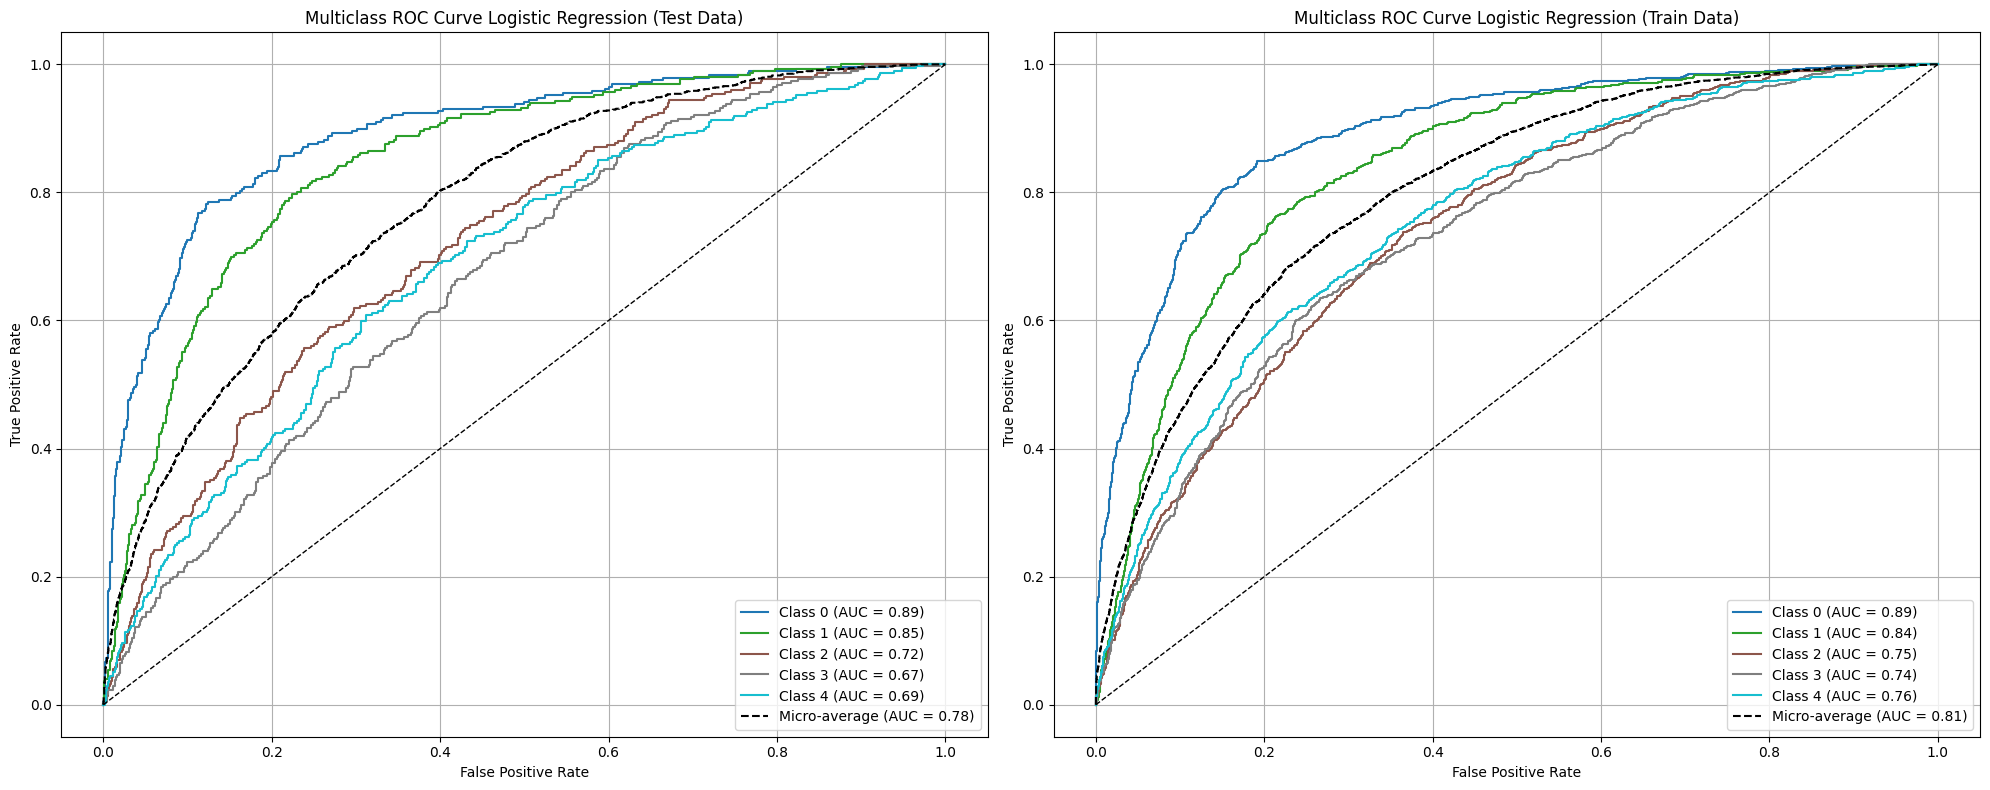

In [110]:
# Initialize subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# First subplot: Test ROC Curve
fpr_test = {}
tpr_test = {}
roc_auc_test = {}

# Compute ROC curve and AUC for each class (test data)
for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_lr_prob[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_bin[:, i], y_test_pred_lr_prob[:, i])

# Compute micro-average ROC curve and AUC (test data)
fpr_micro_test, tpr_micro_test, _ = roc_curve(y_test_bin.ravel(), y_test_pred_lr_prob.ravel())
roc_auc_micro_test = roc_auc_score(y_test_bin, y_test_pred_lr_prob, average="micro")

colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors
for i in range(n_classes):
    axes[0].plot(fpr_test[i], tpr_test[i], label=f"Class {i} (AUC = {roc_auc_test[i]:.2f})", color=colors(i))

axes[0].plot(fpr_micro_test, tpr_micro_test, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro_test:.2f})")
axes[0].plot([0, 1], [0, 1], 'k--', lw=1)
axes[0].set_title("Multiclass ROC Curve Logistic Regression (Test Data)")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Second subplot: Train ROC Curve
fpr_train = {}
tpr_train = {}
roc_auc_train = {}

# Compute ROC curve and AUC for each class (train data)
for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_pred_lr_prob[:, i])
    roc_auc_train[i] = roc_auc_score(y_train_bin[:, i], y_train_pred_lr_prob[:, i])

# Compute micro-average ROC curve and AUC (train data)
fpr_micro_train, tpr_micro_train, _ = roc_curve(y_train_bin.ravel(), y_train_pred_lr_prob.ravel())
roc_auc_micro_train = roc_auc_score(y_train_bin, y_train_pred_lr_prob, average="micro")

for i in range(n_classes):
    axes[1].plot(fpr_train[i], tpr_train[i], label=f"Class {i} (AUC = {roc_auc_train[i]:.2f})", color=colors(i))

axes[1].plot(fpr_micro_train, tpr_micro_train, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro_train:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--', lw=1)
axes[1].set_title("Multiclass ROC Curve Logistic Regression (Train Data)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()


Logistic performs better in distinguishing the first 2 classes in both train and test than the other three classes

And it also couldn't generlaize on the other 3 classes as the difference between test and train is about 10% (overfitting these classes)

C:\Users\user\AppData\Local\Temp\ipykernel_8384\750468290.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors


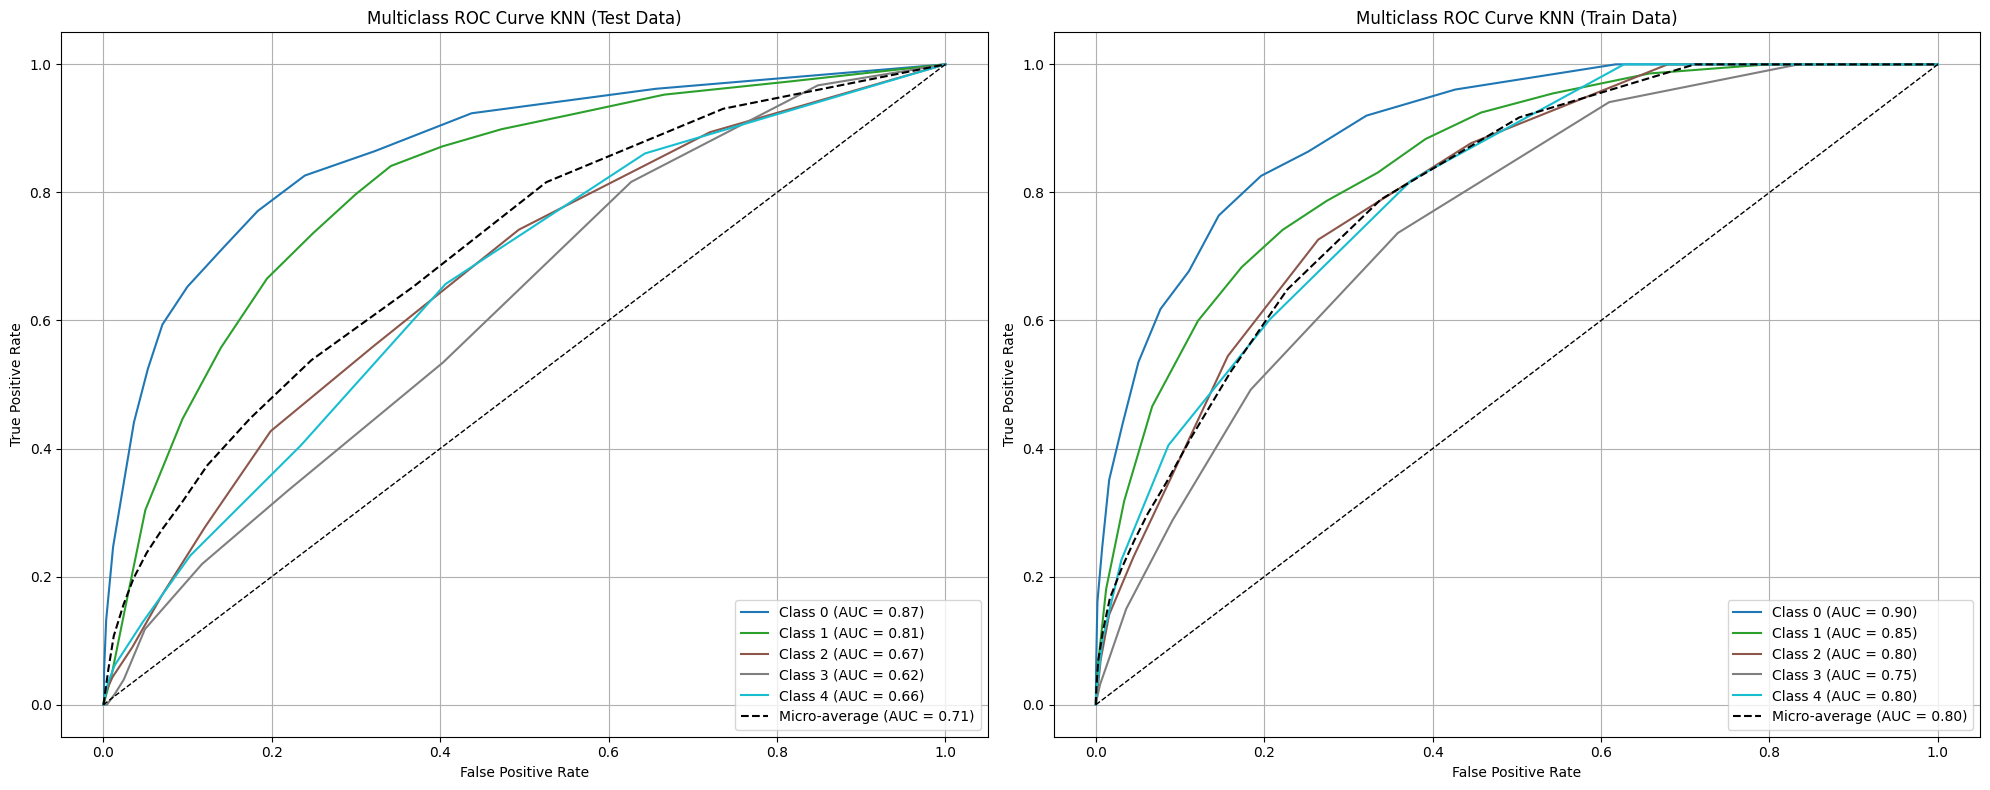

In [111]:
import matplotlib.pyplot as plt

# Initialize subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# First subplot: Test ROC Curve
fpr_test = {}
tpr_test = {}
roc_auc_test = {}

# Compute ROC curve and AUC for each class (test data)
for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_knn_prob[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_bin[:, i], y_test_pred_knn_prob[:, i])

# Compute micro-average ROC curve and AUC (test data)
fpr_micro_test, tpr_micro_test, _ = roc_curve(y_test_bin.ravel(), y_test_pred_knn_prob.ravel())
roc_auc_micro_test = roc_auc_score(y_test_bin, y_test_pred_knn_prob, average="micro")

colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors
for i in range(n_classes):
    axes[0].plot(fpr_test[i], tpr_test[i], label=f"Class {i} (AUC = {roc_auc_test[i]:.2f})", color=colors(i))

axes[0].plot(fpr_micro_test, tpr_micro_test, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro_test:.2f})")
axes[0].plot([0, 1], [0, 1], 'k--', lw=1)
axes[0].set_title("Multiclass ROC Curve KNN (Test Data)")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Second subplot: Train ROC Curve
fpr_train = {}
tpr_train = {}
roc_auc_train = {}

# Compute ROC curve and AUC for each class (train data)
for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_pred_knn_prob[:, i])
    roc_auc_train[i] = roc_auc_score(y_train_bin[:, i], y_train_pred_knn_prob[:, i])

# Compute micro-average ROC curve and AUC (train data)
fpr_micro_train, tpr_micro_train, _ = roc_curve(y_train_bin.ravel(), y_train_pred_knn_prob.ravel())
roc_auc_micro_train = roc_auc_score(y_train_bin, y_train_pred_knn_prob, average="micro")

for i in range(n_classes):
    axes[1].plot(fpr_train[i], tpr_train[i], label=f"Class {i} (AUC = {roc_auc_train[i]:.2f})", color=colors(i))

axes[1].plot(fpr_micro_train, tpr_micro_train, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro_train:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--', lw=1)
axes[1].set_title("Multiclass ROC Curve KNN (Train Data)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()


Here KNN also performs better on the first 2 classes on both train and test data but it is worth in the genralization of the other 3 classes as here the difference between the test and train is about 20% per each class

so the logistic is also better in terms of AUC Graph

### Precison recall

In [114]:
from sklearn.metrics import precision_score, recall_score

# Using macro average as we want to give all the classes the same importance
precision_train_lr = precision_score(y_train, y_train_pred_lr, average='macro')
recall_train_lr = recall_score(y_train, y_train_pred_lr, average='macro')
precision_test_lr = precision_score(y_test, y_test_pred_lr, average='macro')
recall_test_lr = recall_score(y_test, y_test_pred_lr, average='macro')


# Print results
print("Logistic Regression Train Precision (Macro):", precision_train_lr)
print("Logistic Regression Test Precision (Macro):", precision_test_lr)
print("Logistic Regression Train Recall (Macro):", recall_train_lr)
print("Logistic Regression Test Recall (Macro):", recall_test_lr)

Logistic Regression Train Precision (Macro): 0.4977064432246644
Logistic Regression Test Precision (Macro): 0.45089397394706826
Logistic Regression Train Recall (Macro): 0.5020132802684873
Logistic Regression Test Recall (Macro): 0.47776726760911714


In [113]:
# Using macro average as we want to give all the classes the same importance
precision_train_knn = precision_score(y_train, y_train_pred_knn, average='macro')
recall_train_knn = recall_score(y_train, y_train_pred_knn, average='macro')
precision_test_knn = precision_score(y_test, y_test_pred_knn, average='macro')
recall_test_knn = recall_score(y_test, y_test_pred_knn, average='macro')

#print results
print("KNN Train Precision (Macro):", precision_train_knn)
print("KNN Test Precision (Macro):", precision_test_knn)
print("KNN Train Recall (Macro):", recall_train_knn)
print("KNN Test Recall (Macro):", recall_test_knn)

KNN Train Precision (Macro): 0.4961168526971199
KNN Test Precision (Macro): 0.40071389952288383
KNN Train Recall (Macro): 0.44032522765570076
KNN Test Recall (Macro): 0.4106411675142313


1. Logistic Regression on train it's guess for each class is correct by about 50% (precision) and captures about 50% of each class true positives (recall)
2. Logistic Regression on test it's guess for each class is correct drops to 45% (precision) and captures about 47% of each class true positives (recall)
3. KNN Regression on train it's guess for each class is correct by about 50% (precision) and captures about 44% of each class true positives (recall)
4. KNN Regression on test it's guess for each class is correct drops to 40% (precision) and captures about 41% of each class true positives (recall)

Conclusion:
* Both models doesn't perform better and are near random guessing on some classes
* Logistic Regression is better in generlaization than KNN (less overfit) 
* Logistic Regression scores on test are better than KNN 
* Logistic Regression is better than KNN in terms of precision recall scores

## Conclusion

Both models performs bad on the data but Logistic Regression is better than KNN in terms of all evaluation metrics and it also less overfit the data

## Pipeline

### Logistic

In [5]:
import cv2
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

# Preprocessing class
class PreprocessImage:
    def __init__(self, image_size=(64, 64)):
        self.image_size = image_size

    def transform(self, X):
        processed_data = []
        for img_path in X:
            try:
                # Read the image
                img = cv2.imread(img_path)
                if img is None:
                    raise ValueError(f"Image at {img_path} is invalid.")
                
                # Resize the image
                img = cv2.resize(img, self.image_size)

                # Convert to Lab color space
                lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
                a_channel = lab_img[:, :, 1] / 255.0  # Normalize
                b_channel = lab_img[:, :, 2] / 255.0  # Normalize

                # Combine a and b channels
                combined_lab = np.dstack((a_channel, b_channel)).flatten()

                processed_data.append(combined_lab)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
        
        # Convert to DataFrame with feature names
        num_features = processed_data[0].shape[0]  # Get the number of features
        feature_names = [f"{i}" for i in range(num_features)]  # Create feature names
        return pd.DataFrame(processed_data, columns=feature_names)

    def fit(self, X, y=None):
        return self  # No fitting needed for this step


In [27]:
pipeline_logistic = Pipeline([
    ('preprocessing', PreprocessImage(image_size=(64, 64))),
    ('pca', pca),  # Use the pre-trained PCA object
    ('classifier', model)  # Use the pre-trained model
])

In [28]:
def predict_image_logistic(image_path, pipeline, label_encoder):
    prediction = pipeline.predict([image_path])
    return label_encoder.inverse_transform(prediction)

In [29]:
image_path = "chocolate cake.jpg"
predicted_label = predict_image_logistic(image_path, pipeline_logistic, label_encoder)
print(f"Predicted Label: {predicted_label}")

Predicted Label: ['chocolate_cake']


In [34]:
image_path = "churros.jpg"
predicted_label = predict_image_logistic(image_path, pipeline_logistic, label_encoder)
print(f"Predicted Label: {predicted_label}")

Predicted Label: ['churros']


### KNN

In [30]:
pipeline_knn = Pipeline([
    ('preprocessing', PreprocessImage(image_size=(64, 64))),
    ('pca', pca),  # Use the pre-trained PCA object
    ('classifier', knn)  # Use the pre-trained model
])

In [31]:
def predict_image_knn(image_path, pipeline, label_encoder):
    prediction = pipeline.predict([image_path])
    return label_encoder.inverse_transform(prediction)

In [32]:
image_path = "chocolate cake.jpg"
predicted_label = predict_image_knn(image_path, pipeline_knn, label_encoder)
print(f"Predicted Label: {predicted_label}")

Predicted Label: ['chocolate_cake']


In [33]:
image_path = "churros.jpg"
predicted_label = predict_image_knn(image_path, pipeline_knn, label_encoder)
print(f"Predicted Label: {predicted_label}")

Predicted Label: ['churros']


## Save the pipeline

In [36]:
import joblib

# Save the entire pipeline
joblib.dump(pipeline_logistic, 'image_classification_pipeline_logistic.pkl')

print("Pipeline saved successfully!")


Pipeline saved successfully!


In [37]:
# Save the entire pipeline
joblib.dump(pipeline_knn, 'image_classification_pipeline_knn.pkl')

print("Pipeline saved successfully!")

Pipeline saved successfully!


In [38]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

## Re-Use the pipelines

In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

# Preprocessing class
class PreprocessImage:
    def __init__(self, image_size=(64, 64)):
        self.image_size = image_size

    def transform(self, X):
        processed_data = []
        for img_path in X:
            try:
                # Read the image
                img = cv2.imread(img_path)
                if img is None:
                    raise ValueError(f"Image at {img_path} is invalid.")
                
                # Resize the image
                img = cv2.resize(img, self.image_size)

                # Convert to Lab color space
                lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
                a_channel = lab_img[:, :, 1] / 255.0  # Normalize
                b_channel = lab_img[:, :, 2] / 255.0  # Normalize

                # Combine a and b channels
                combined_lab = np.dstack((a_channel, b_channel)).flatten()

                processed_data.append(combined_lab)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
        
        # Convert to DataFrame with feature names
        num_features = processed_data[0].shape[0]  # Get the number of features
        feature_names = [f"{i}" for i in range(num_features)]  # Create feature names
        return pd.DataFrame(processed_data, columns=feature_names)

    def fit(self, X, y=None):
        return self  # No fitting needed for this step


In [2]:
def predict_image_knn(image_path, pipeline, label_encoder):
    prediction = pipeline.predict([image_path])
    return label_encoder.inverse_transform(prediction)

In [3]:
def predict_image_logistic(image_path, pipeline, label_encoder):
    prediction = pipeline.predict([image_path])
    return label_encoder.inverse_transform(prediction)

In [4]:
import joblib
label_encoder = joblib.load('label_encoder.pkl')

In [5]:
# Load the saved pipeline
pipeline_logistic = joblib.load('image_classification_pipeline_logistic.pkl')

# Example usage: Predict a new image
image_path = "chocolate cake.jpg"
predicted_label = predict_image_logistic(image_path, pipeline_logistic, label_encoder)
print(f"Predicted Label: {predicted_label}")


Predicted Label: ['chocolate_cake']


In [6]:
# Load the saved pipeline
pipeline_knn = joblib.load('image_classification_pipeline_knn.pkl')

# Example usage: Predict a new image
image_path = "chocolate cake.jpg"
predicted_label = predict_image_knn(image_path, pipeline_knn, label_encoder)
print(f"Predicted Label: {predicted_label}")


Predicted Label: ['chocolate_cake']
